In [2]:
import scanpy as sc # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore
import os

In [3]:
# adata = sc.read_h5ad("./input_data/adata_course_part1.h5ad") # VM
adata = sc.read_h5ad(os.path.normpath("../data/input_data/adata_course_part1.h5ad")) # Win

In [4]:
display(adata)

AnnData object with n_obs × n_vars = 14878 × 22546
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'fraction_mito', 'n_genes', 'num_spliced', 'num_ambiguous', 'num_unspliced', 'fraction_spliced', 'is_cell', 'is_high_quality', 'is_nonambient', 'is_not_debris', 'soupc_rho', 'sample'
    var: 'gene_ids', 'feature_types', 'soup_profile'
    layers: 'X_beforeAmbientRemoval', 'ambiguous', 'spliced', 'unspliced'

In [5]:
var_names = adata.var_names.astype("str")
mito_genes = var_names.str.startswith("mt-")
# Annotate mitochondrial genes in adata.var
adata.var["mito"] = mito_genes

adata.obs["fraction_mito"] = (
        1 + np.sum(adata[:, mito_genes].X, axis=1).A1) / (1 + np.sum(adata.X, axis=1).A1)
adata.obs["n_counts"] = adata.X.sum(axis=1).A1
adata.obs["n_genes"] = (adata.X > 0).sum(axis=1).A1
max_fraction_mito = np.mean(adata.obs["fraction_mito"]) + 2 * np.std(adata.obs["fraction_mito"])
print(adata.obs["fraction_mito"].shape)
print(max_fraction_mito)


(14878,)
0.07954808890994752


In [4]:
num_cells, num_genes = adata.X.shape # len 2
print(f"Number of Tent. Cells: {num_cells}\nNumber of Genes: {num_genes}")

Number of Tent. Cells: 14878
Number of Genes: 22546


In [28]:
# Test calling
display(adata.obs["sample"])
# adata.obs["sample"].size
adata.obs.shape

AAACCCAAGTTGGCGA-rd10    rd10
AAACCCACAGAAACCG-rd10    rd10
AAACCCAGTGCCGTAC-rd10    rd10
AAACCCATCGCGCCAA-rd10    rd10
AAACGAAAGCAACCAG-rd10    rd10
                         ... 
TTTGTTGAGCTCTTCC-wt        wt
TTTGTTGCATCTCCCA-wt        wt
TTTGTTGCATCTGTTT-wt        wt
TTTGTTGTCCAACTGA-wt        wt
TTTGTTGTCGAACACT-wt        wt
Name: sample, Length: 14878, dtype: category
Categories (2, object): ['rd10', 'wt']

(14878, 15)

In [39]:
samples = (adata.obs["sample"]
           .value_counts()
           .divide(adata.obs["sample"].size)
           .multiply(100))

with pd.option_context("display.float_format","{:,.2f}% of samples".format):
    display(samples)
    # print(samples)

wt     53.77% of samples
rd10   46.23% of samples
Name: sample, dtype: float64

In [80]:
adata.obs["X_sum"] = adata.X.sum(axis=1)
# cells_above_10k = sum(adata.obs["X_sum"]>10000)
cells_above_10k = (adata.obs["X_sum"]>10000).sum()

type(cells_above_10k)

numpy.int64

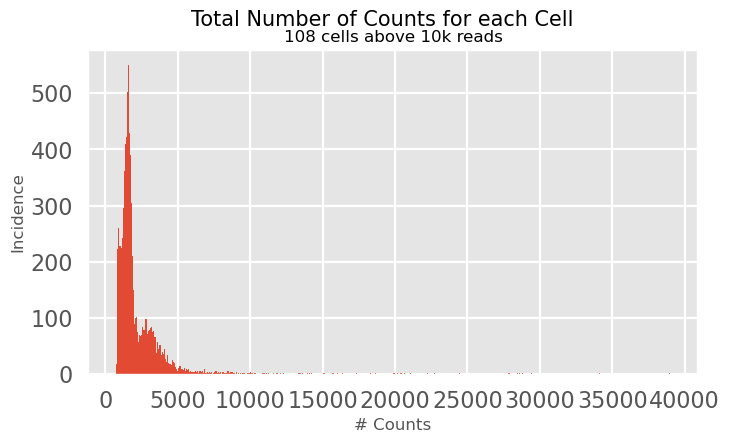

In [84]:
import matplotlib.pyplot as plt # type: ignore

plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-v0_8-poster')
plt.hist(adata.obs["X_sum"],bins=1000)
plt.xlabel("# Counts")
plt.ylabel("Incidence")
plt.suptitle("Total Number of Counts for each Cell",
             fontsize=15)
plt.title(f"{cells_above_10k} cells above 10k reads",
          fontsize=12)

fig = plt.gcf()
fig.set_size_inches(7,4)


In [68]:
type(adata.X)


scipy.sparse._csr.csr_matrix

In [70]:
sum(adata.obs["X_sum"]>10000)

108